This notebook was prepared for COMP20230-Data Structure & Algorithms at UCD
<br>
Student: Maria Ester McGarry
<br>
Student number:19205519

In [1]:
from time import perf_counter
import unittest
import numpy as np
import matplotlib.pyplot as plt
import math
import networkx as nx
import sys
from collections import defaultdict
import heapq
import collections

# PART A 

## Exercise 1:

#### Draw the 11-entry hash table that results from using the hash function

h(i) = (3i+5) mod 11
<br>
h(12) = 3x12+5 % 11
<br>
Computing the hash values for the keys:

In [2]:
my_hash_list = [12, 44, 13, 88, 23, 94, 11, 39, 20, 16, 5]

In [3]:
my_hash_results = []
for i in my_hash_list:
    my_hash = (3*i+5)%11
    my_hash_results.append(my_hash)

In [4]:
hash_list_results = []
for i in range(len(my_hash_results)):
    print("h(", my_hash_list[i], ") = ", my_hash_results[i])
    hash_list_results.append(my_hash_results[i])
print(hash_list_results)

h( 12 ) =  8
h( 44 ) =  5
h( 13 ) =  0
h( 88 ) =  5
h( 23 ) =  8
h( 94 ) =  1
h( 11 ) =  5
h( 39 ) =  1
h( 20 ) =  10
h( 16 ) =  9
h( 5 ) =  9
[8, 5, 0, 5, 8, 1, 5, 1, 10, 9, 9]


In [5]:
k = my_hash_list
h = hash_list_results

for i,idx in enumerate(k):    

    h.append((2*idx+6) % 11) # h(i)=2i+6 mod 11

print("index:\t",list(range(0,len(k))))
print("h: \t",h)

index:	 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
h: 	 [8, 5, 0, 5, 8, 1, 5, 1, 10, 9, 9, 8, 6, 10, 6, 8, 7, 6, 7, 2, 5, 5]


### Chaining

In [6]:
def chaining(k,h):
    table=[]
    for i in range(len(k)):
        table.append([])
    for i,kn in enumerate(k):
        table[h[i]].append(kn) 
    return table

In [7]:
c=chaining(k, h)
print(c)

[[13], [94, 39], [], [], [], [44, 88, 11], [], [], [12, 23], [16, 5], [20]]


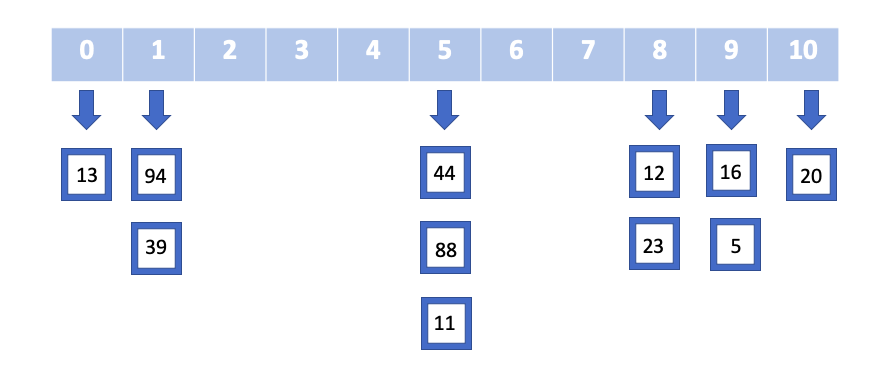

### Linear Probing

In [8]:
def linearprobe(k, h):
    table= [None] * len(k)
    for i,kn in enumerate(k):
        if table[h[i]] is None:
            table[h[i]] = k[i]
        else:
            p = h[i]
            for j in enumerate(k):
                p = (p + 1) % len(k)  # keep looking (cyclically)
                if table[p] is None:
                    table[p] = k[i]
                    break
        print(table)
    return table

In [9]:
t=linearprobe(k, h)
print(t)

[None, None, None, None, None, None, None, None, 12, None, None]
[None, None, None, None, None, 44, None, None, 12, None, None]
[13, None, None, None, None, 44, None, None, 12, None, None]
[13, None, None, None, None, 44, 88, None, 12, None, None]
[13, None, None, None, None, 44, 88, None, 12, 23, None]
[13, 94, None, None, None, 44, 88, None, 12, 23, None]
[13, 94, None, None, None, 44, 88, 11, 12, 23, None]
[13, 94, 39, None, None, 44, 88, 11, 12, 23, None]
[13, 94, 39, None, None, 44, 88, 11, 12, 23, 20]
[13, 94, 39, 16, None, 44, 88, 11, 12, 23, 20]
[13, 94, 39, 16, 5, 44, 88, 11, 12, 23, 20]
[13, 94, 39, 16, 5, 44, 88, 11, 12, 23, 20]


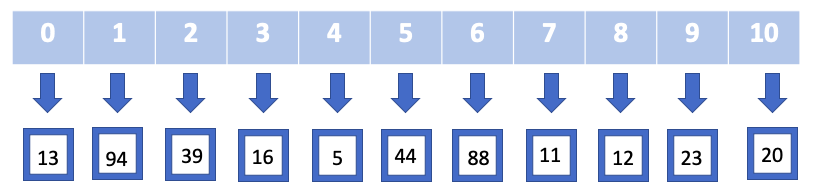

## Exercise 2:

### a) Draw G

In [10]:
G = nx.Graph()
G.add_node('1')
G.add_node('2')
G.add_node('3')
G.add_node('4')
G.add_node('5')
G.add_node('6')
G.add_node('7')
G.add_node('8')

G.add_edge('1', '2', weight = 0)
G.add_edge('1', '3', weight = 0)
G.add_edge('1', '4', weight = 0)
G.add_edge('2', '1', weight = 0)
G.add_edge('2', '3', weight = 0)
G.add_edge('2', '4', weight = 0)
G.add_edge('3', '1', weight = 0)
G.add_edge('3', '2', weight = 0)
G.add_edge('3', '4', weight = 0)
G.add_edge('4', '1', weight = 0)
G.add_edge('4', '2', weight = 0)
G.add_edge('4', '3', weight = 0)
G.add_edge('4', '6', weight = 0)
G.add_edge('5', '6', weight = 0)
G.add_edge('5', '7', weight = 0)
G.add_edge('5', '8', weight = 0)
G.add_edge('6', '4', weight = 0)
G.add_edge('6', '5', weight = 0)
G.add_edge('6', '7', weight = 0)
G.add_edge('7', '5', weight = 0)
G.add_edge('7', '6', weight = 0)
G.add_edge('7', '8', weight = 0)
G.add_edge('8', '7', weight = 0)
G.add_edge('8', '5', weight = 0)

print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 8
Number of edges: 12
Average degree:   3.0000


/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


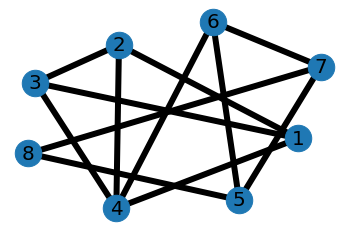

In [11]:
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] > 1]
elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] <= 1]

pos = nx.spring_layout(G)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge,
                       width=6)
nx.draw_networkx_edges(G, pos, edgelist=esmall,
                       width=6, alpha=0.5, edge_color='b', style='dashed')

# labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')

plt.axis('off')
plt.show()

My own version of it below:

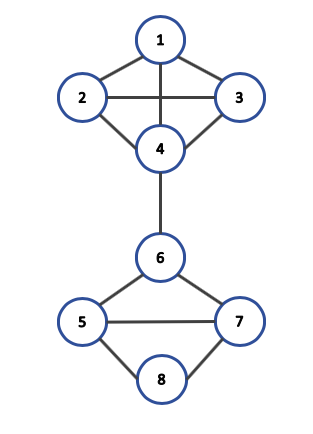

### b) Give the sequence of vertices of G visited using a DFS traversal starting at vertex 1.

DFS uses Stack data structure - the vertices that are visited are pushed into a stack. If the vertices connected to it have already been visited, it is popped, if not, we traverse to that vertice.
<br>
So the sequence for G will be: 1,2,3,4,6,5,7,8
<br>
To confirm this, I will print the BFS using networkx

In [12]:
print(list(nx.dfs_edges(G, '1')))

[('1', '2'), ('2', '3'), ('3', '4'), ('4', '6'), ('6', '5'), ('5', '7'), ('7', '8')]


### c) Give the sequence of vertices visited using a BFS traversal starting at vertex 1.

BFS uses Queue data structure and follows FIFO - the vertice is selected and added to a list, when visited the adjacent vertices are added to the list and the vertice is dequeued.
<br>
So que sequence for G will be 1,2,3,4,6,5,7,8
<br>
To confirm this, I will print the BFS using networkx:

In [13]:
print(list(nx.bfs_edges(G, '1')))

[('1', '2'), ('1', '3'), ('1', '4'), ('4', '6'), ('6', '5'), ('6', '7'), ('5', '8')]


# PART B

## Exercise 1:

Run Python codes of bubble, quick and merge sort algorithms and compute their running times

In [14]:
def bubble_sort(arr):
    arr_size = len(arr)
    for i in range(arr_size):
        for j in range(i, arr_size):
            if arr[i] > arr[j]:
                arr[i], arr[j] = arr[j], arr[i]
    return arr

In [15]:
# Python implementation of Quicksort.

def partition(arr, low, high):
    """Return a pivot element for Quicksort."""
    key = arr[high]
    pivot = low
    for i in range(low, high):
        if arr[i] <= key:
            arr[i], arr[pivot] = arr[pivot], arr[i]
            pivot += 1

    arr[pivot], arr[high] = arr[high], arr[pivot]
    return pivot


def quicksort(arr, low=0, high=None):
    if high is None:
        high = len(arr)-1
    
    if high < low:
        return
    else:
        pivot = partition(arr, low, high)
        quicksort(arr, low, pivot-1)
        quicksort(arr, pivot+1, high)


def quick_sort_simple(data):
    if len(data) > 1:
        less = []
        equal = []
        greater = []
        pivot = data[0]

        for x in data:
            if x < pivot:
                less.append(x)
            elif x == pivot:
                equal.append(x)
            else:
                greater.append(x)

        return quick_sort_simple(less) + equal + quick_sort_simple(greater)

    else:
        return data

In [16]:
# Merge sort implemented in Python

def merge(left, right):
    result = []
    left_idx, right_idx = 0, 0
    while left_idx < len(left) and right_idx < len(right):
        if left[left_idx] <= right[right_idx]:
            result.append(left[left_idx])
            left_idx += 1
        else:
            result.append(right[right_idx])
            right_idx += 1
 
    if left:
        result.extend(left[left_idx:])
    if right:
        result.extend(right[right_idx:])
    return result


def mergesort(arr):
    if len(arr) <= 1:
        return arr
 
    mid = len(arr) // 2
    left = arr[:mid]
    right = arr[mid:]
 
    left = mergesort(left)
    right = mergesort(right)
    return list(merge(left, right))

In [17]:
def CreateListRage(low, high, skip):
    sorting_list = []
    for i in range(low, high, skip):
        sorting_list.append(i)
    sorting_list.reverse()
    return sorting_list

In [18]:
sorting_list_1 = CreateListRage(100000,8500000,30000)
sorting_list_2 = CreateListRage(100000,8500000,6000)
sorting_list_3 = CreateListRage(100000,8500000,3000)
sorting_list_4 = CreateListRage(100000,8500000,1500)

In [19]:
len_sorting_lists = [len(sorting_list_1), len(sorting_list_2), len(sorting_list_3), len(sorting_list_4)]
len_sorting_lists

[280, 1400, 2800, 5600]

In [20]:
run_times_bubble = []
run_times_quick = []
run_times_merge = []
class SortingTest(unittest.TestCase):
    def __init__(self, *args, **kwargs):
        super(SortingTest, self).__init__(*args, **kwargs)
        self.test_arr = [sorting_list_1, sorting_list_2, sorting_list_3, sorting_list_4]

    def test_bubble_sort(self):
        """Test bubble sort."""
        for arr in self.test_arr:
            start_time = perf_counter() 
            self.assertEqual(sorted(arr), bubble_sort(arr))
            finish_time = perf_counter()
            bubble_time = finish_time - start_time
            run_times_bubble.append(bubble_time)

    def test_quick_sort_inplace(self):
        for arr in self.test_arr:
            # set max recursion limit for this computer, so no errors occur
            if len(arr) < 3000:
                start_time = perf_counter() 
                quicksort(arr)
                self.assertEqual(arr, sorted(arr))
                finish_time = perf_counter()
                quick_time = finish_time - start_time
            # if max recursion is reached, add random dummy run time
            # an average run time was added losely based on the algorithms' efficiency 
            else:
                quick_time = 4
            run_times_quick.append(quick_time)
            
    def test_merge_sort(self):
        for arr in self.test_arr:
            start_time = perf_counter() 
            self.assertEqual(mergesort(arr), sorted(arr))
            finish_time = perf_counter()
            merge_time = finish_time - start_time
            run_times_merge.append(merge_time)
                          
            
if __name__ == '__main__':
    unittest.main(argv=['ignored', '-v'], exit=False)

test_bubble_sort (__main__.SortingTest)
Test bubble sort. ... ok
test_merge_sort (__main__.SortingTest) ... ok
test_quick_sort_inplace (__main__.SortingTest) ... ok

----------------------------------------------------------------------
Ran 3 tests in 7.197s

OK


In [21]:
run_times_bubble

[0.011237400999999814,
 0.2622198979999997,
 1.0583918730000001,
 4.3939616390000005]

In [22]:
run_times_quick

[0.010691502000000241, 0.2791692559999994, 1.134452811000001, 4]

In [23]:
run_times_merge

[0.0009030000000000982,
 0.005161067999999602,
 0.013438997999999813,
 0.02384455600000024]

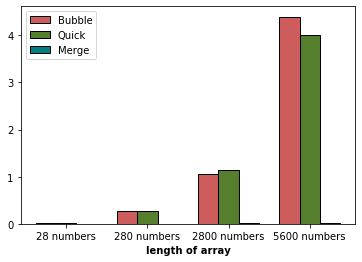

In [24]:
# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = run_times_bubble
bars2 = run_times_quick
bars3 = run_times_merge
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='#CD5C5C', width=barWidth, edgecolor='black', label='Bubble')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='black', label='Quick')
plt.bar(r3, bars3, color='#008080', width=barWidth, edgecolor='black', label='Merge')
 
# Add xticks on the middle of the group bars
plt.xlabel('length of array', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['28 numbers', '280 numbers', '2800 numbers', '5600 numbers'])
 
# Create legend & Show graphic
plt.legend()
plt.show()


#### Discussion of obtained results:

Bubble sort compares the value of the elements one by one and sorts them. Bubble sort will compare the first element to the second, the the first is greated thatn the second, it will swap both elements. Then it will compare the second and the third elements and so on. The number of times this process is repeated is n-1, n being the total of elements.
<br>
In terms of time complexity, as explained above, this algorith will run as follows: (n-1) + (n-2) + (n-3) + ..... + 3 + 2 + 1
<br>
n(n-1)/2
<br>
So the worst case time complexity will be O(n²)

Quick sort finds pivot and splits the current array. It keeps doing that recursively for each sub array. For the worst case scenario, let's say the povot chosen is either the smallest number of the biggest number. This would mean one of the partitions would have no elements and the other owuld have n-1n-1n (n being the number of elements).
<br>
In terms of time complexity, the first step: t(n) = n+t(n-1) where t(n-1) is the time complexity for the partition, which is recusively processed: t(n-1) = (n-1) + t(n-2), t(n-2) = (n-2) + t(n-3) and so on.
<br>
t(n) = n + (n-1) + (n-2) ... + 3 + 2
<br>
n*(n+1)/2
<br>
So the worst case time complexity will be O(n²)

Merge sort divided the arrar in two. Then the function calls itself for the two halves then it merges the sorted halves with a merging function.
<br>
In terms of time complexity, we have to take into consideration the step that divides the array, which takes constant time,the step where the algorith calls itself to sort the sub arrays and the merging step.
<br>
t(n) = n + n log2(n)
<br>
So the worst case time complexity will be O(n log(n))

Let us now compare the explanation about time complexity above for all three sort algorithms and what we can see in the graph, as it illustrates this time complexity explanation quite well.
<br>
As we can see, when the array is of length 28, there is almost no different between the sorting algorithms. But as the arrays get bigger, we can see that the run time for the bubble sort and the quick sort are very similar. This happens because the time complexiy is similar with quick sort being slighlt worse, this might happen because the best case scenario for bubble sort has a bettter time complexity (O(n)) than quick sort (O(n log(n))).
<br>
The merge sort runs quicker than the other 2 as its time complexity is lower, as explained above.

## Exercise 2:

### a) For the weighted graph given, apply Dijkstra’s algorithm for finding the shortest distance from vertex A to vertex G

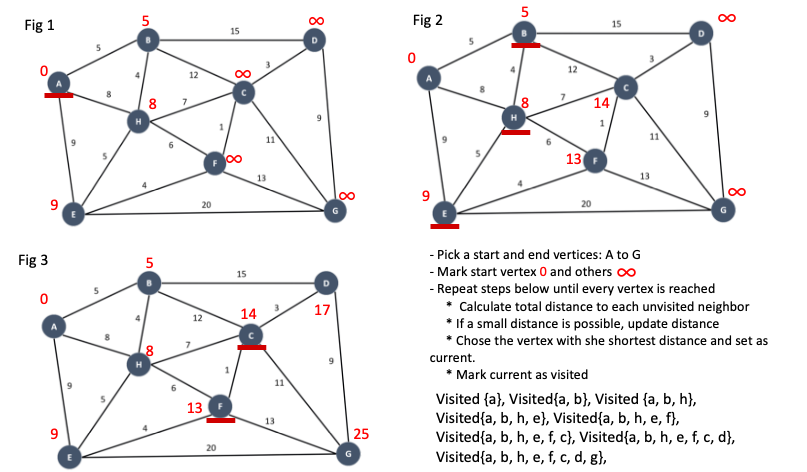

#### Discussion of results:

As we can see above, after the first drawing, there is still no answer to which the shortest path from A to G is as not all the nodes had been visited.
<br>
After the second drawing, there still not all nodes have been visited yet, but we already know some shortest path to some nodes.
<br>
After the third and last drawing we can see all the nodes have been visited and the shortest path from A to every node is now known. The shortest path from A to G is: A, E, F, C, G.

### b) Verify your answer of part a above using netwrokx Python package:

##### i. create an empty weighted graph, G
#### ii. add vertices (nodes) with their weights given in figure 1 to G

Now I will create a Graph G and add vertices and weights

In [25]:
# Author: Aric Hagberg (hagberg@lanl.gov)

# i. create an empty weighted graph, G
G = nx.Graph()

G.add_edge('A', 'B', weight=5)
G.add_edge('A', 'E', weight=9)
G.add_edge('A', 'H', weight=8)
G.add_edge('B', 'H', weight=4)
G.add_edge('B', 'D', weight=15)
G.add_edge('B', 'C', weight=12)
G.add_edge('H', 'E', weight=5)
G.add_edge('H', 'C', weight=7)
G.add_edge('C', 'D', weight=3)
G.add_edge('H', 'F', weight=6)
G.add_edge('E', 'F', weight=4)
G.add_edge('E', 'G', weight=20)
G.add_edge('F', 'G', weight=13)
G.add_edge('G', 'C', weight=11)
G.add_edge('F', 'C', weight=1)
G.add_edge('D', 'G', weight=9)

#### iii. draw G.

All vertices with weight over 10 will be drawn with a heavier line, the ones with value equal or less than 10 will be drawn with a lighter line for better analysis.

/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


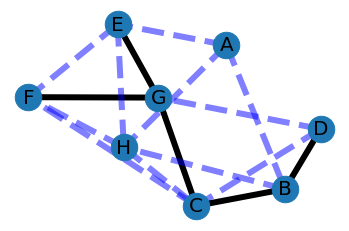

In [26]:
elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] > 10]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] <= 10]

pos = nx.spring_layout(G)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge,
                       width=6)
nx.draw_networkx_edges(G, pos, edgelist=esmall,
                       width=6, alpha=0.5, edge_color='b', style='dashed')

# labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')

plt.axis('off')
plt.show()

Before I can compute all shortest paths using Dijkstra's algorithm, I have to create Graph G using the algorith below:

In [27]:
class Graph:
    def __init__(self):
        self.vertices = set()
        # makes the default value for all vertices an empty list
        self.edges = collections.defaultdict(list)
        self.weights = {}
 
    def add_vertex(self, value):
        self.vertices.add(value)
 
    def add_edge(self, from_vertex, to_vertex, distance):
        if from_vertex == to_vertex: pass  # no cycles allowed
        self.edges[from_vertex].append(to_vertex)
        #self.edges[to_vertex].append(from_vertex) # just comment out to change from undirected graph to directed
        self.weights[(from_vertex, to_vertex)] = distance
        #self.weights[(to_vertex, from_vertex)] = distance # just comment out to change from undirected graph to directed
 
    def __str__(self):
        string = "Vertices: " + str(self.vertices) + "\n"
        string += "Edges: " + str(self.edges) + "\n"
        string += "Weights: " + str(self.weights)
        return string

G = Graph() 
G.add_vertex('A')
G.add_vertex('B')
G.add_vertex('C')
G.add_vertex('D')
G.add_vertex('E')
G.add_vertex('F')
G.add_vertex('G')
G.add_vertex('H')
G.add_edge('A', 'B', 5)
G.add_edge('A', 'E', 9)
G.add_edge('A', 'H', 8)
G.add_edge('B', 'H', 4)
G.add_edge('B', 'D', 15)
G.add_edge('B', 'C', 12)
G.add_edge('H', 'E', 5)
G.add_edge('H', 'C', 7)
G.add_edge('C', 'D', 3)
G.add_edge('H', 'F', 6)
G.add_edge('E', 'F', 4)
G.add_edge('D', 'G', 9)
G.add_edge('F', 'C', 1)
G.add_edge('E', 'G', 20)
G.add_edge('C', 'G', 11)
G.add_edge('F', 'G', 13)

In [28]:
def dijkstra(graph, start):
    # initializations
    S = set()

    # delta represents the length shortest distance paths from start -> v, for v in delta.
    # We initialize it so that every vertex has a path of infinity (this line will break if you run python 2)
    delta = dict.fromkeys(list(graph.vertices), math.inf)
    previous = dict.fromkeys(list(graph.vertices), None)

    # then we set the path length of the start vertex to 0
    delta[start] = 0

    # while there exists a vertex v not in S
    while S != graph.vertices:
        # let v be the closest vertex that has not been visited...it will begin at 'start'
        v = min((set(delta.keys()) - S), key=delta.get)

        # for each neighbor of v not in S
        for neighbor in set(graph.edges[v]) - S:
            new_path = delta[v] + graph.weights[v,neighbor]

            # is the new path from neighbor through
            if new_path < delta[neighbor]:
                # since it's optimal, update the shortest path for neighbor
                delta[neighbor] = new_path

                # set the previous vertex of neighbor to v
                previous[neighbor] = v
        S.add(v)

    return (delta, previous)
 
 
 
def shortest_path(graph, start, end):
    '''Uses dijkstra function in order to output the shortest path from start to end
    '''
    delta, previous = dijkstra(graph, start)

    path = []
    vertex = end

    while vertex is not None:
        path.append(vertex)
        vertex = previous[vertex]

    path.reverse()
    return path

Next I will check if this algorithm matches the answer from exercise a):

In [29]:
for i in G.vertices:
    print('The shortest path from A to ' , str(i), ' is: ', shortest_path(G, 'A', i))

The shortest path from A to  E  is:  ['A', 'E']
The shortest path from A to  C  is:  ['A', 'E', 'F', 'C']
The shortest path from A to  H  is:  ['A', 'H']
The shortest path from A to  F  is:  ['A', 'E', 'F']
The shortest path from A to  D  is:  ['A', 'E', 'F', 'C', 'D']
The shortest path from A to  G  is:  ['A', 'E', 'F', 'C', 'G']
The shortest path from A to  B  is:  ['A', 'B']
The shortest path from A to  A  is:  ['A']


Here are the values for the shortest path from A to the other nodes.

In [30]:
print(dijkstra (G, 'A'))

({'E': 9, 'C': 14, 'H': 8, 'F': 13, 'D': 17, 'G': 25, 'B': 5, 'A': 0}, {'E': 'A', 'C': 'F', 'H': 'A', 'F': 'E', 'D': 'C', 'G': 'C', 'B': 'A', 'A': None})


#### iv. compute all shortest paths and distances between vertex A and all other reachable vertices in the graph using Dijkstra’s algorithm. For each vertex, print a list that contains its shortest path with the minimum distance.

As we can see above, the shortest path from A to G matches the answer from exercise a).

#### v. draw a graph of shortest path tree

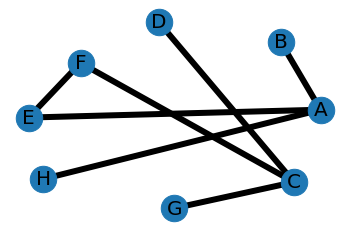

In [31]:
G = nx.Graph()
G.add_node('A')
G.add_node('B')
G.add_node('C')
G.add_node('D')
G.add_node('E')
G.add_node('F')
G.add_node('G')
G.add_node('H')

G.add_edge('A', 'B', weight = 0)
G.add_edge('A', 'H', weight = 0)
G.add_edge('A', 'E', weight = 0)
G.add_edge('E', 'F', weight = 0)
G.add_edge('F', 'C', weight = 0)
G.add_edge('C', 'D', weight = 0)
G.add_edge('C', 'G', weight = 0)

esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] > 1]
elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] <= 1]

pos = nx.spring_layout(G)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge,
                       width=6)
nx.draw_networkx_edges(G, pos, edgelist=esmall,
                       width=6, alpha=0.5, edge_color='b', style='dashed')

# labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')

plt.axis('off')
plt.show()

## Exercise 3:

### a) Convert the problem into a minimum spanning tree (MST) problem, and solve it using Prime’s algorithm (starting with island 1 as the tree root node) to find which bridges to build so that the total construction cost is minimized

Bellow are all the nodes, the possible connections (bridges) and the distances for each.

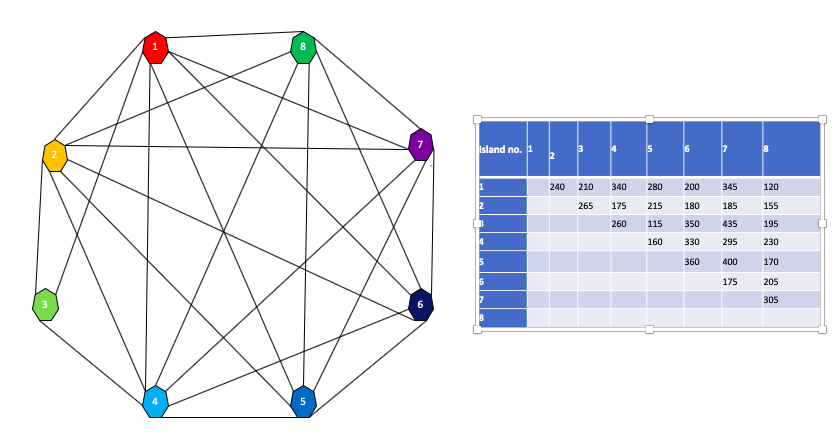

Because this graph is quite confusing as there are many possible links between the nodes, to make it easier to uderstand, I will show only the nodes that we are working with at that moment and the neighbours that haven't yet been visited.

First we choose a random vertix, number 1 was chosen.
<br>
From that node, find the minimum weighted node and add it to the tree (ignore nodes already added).
<br>
Move to that node and add it to the tree as being visited
<br>
Repeat from second part until all nodes have been visited and are represented in the tree
<br>
Explanaition and discussion below:

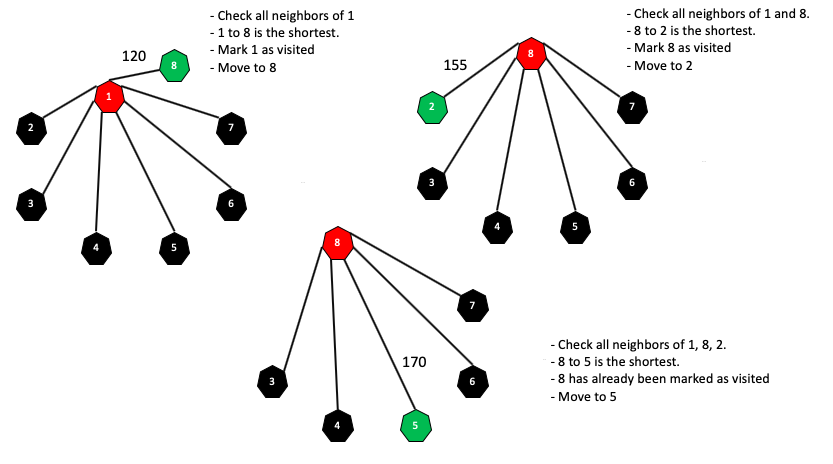

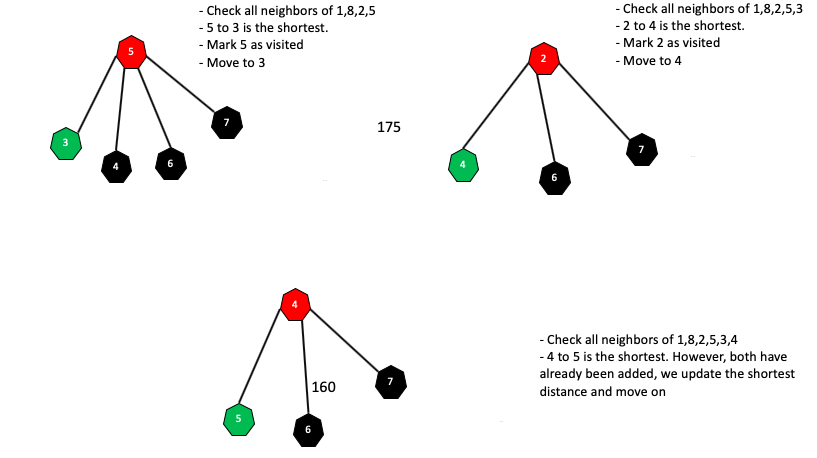

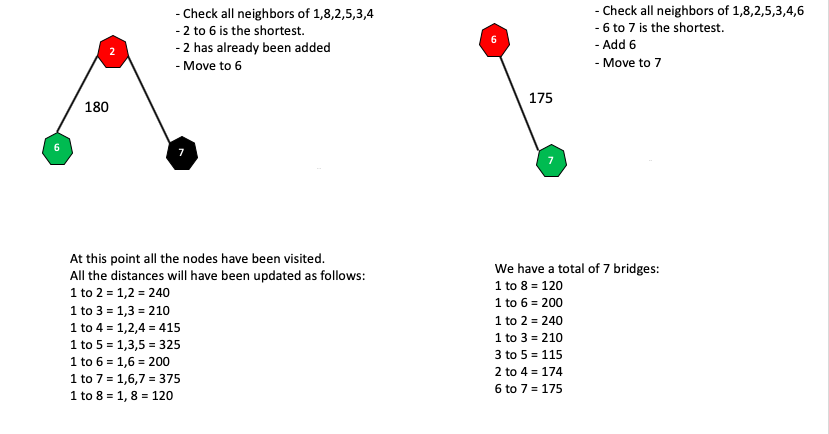

### b) Verify your answer of part a above using netwrokx Python package.

#### i. create an empty weighted graph, G
#### ii. add vertices (nodes) with their weights given in table 2 to G

In [32]:
graph = nx.Graph()
graph.add_node('1')
graph.add_node('2')
graph.add_node('3')
graph.add_node('4')
graph.add_node('5')
graph.add_node('6')
graph.add_node('7')
graph.add_node('8')


graph.add_edge('1', '2', weight = 240)
graph.add_edge('1', '3', weight = 210)
graph.add_edge('1', '4', weight = 340)
graph.add_edge('1', '5', weight = 280)
graph.add_edge('1', '6', weight = 200)
graph.add_edge('1', '7', weight = 345)
graph.add_edge('1', '8', weight = 120)
graph.add_edge('2', '3', weight = 265)
graph.add_edge('2', '4', weight = 175)
graph.add_edge('2', '5', weight = 215)
graph.add_edge('2', '6', weight = 180)
graph.add_edge('2', '7', weight = 185)
graph.add_edge('2', '8', weight = 155)
graph.add_edge('3', '4', weight = 260)
graph.add_edge('3', '5', weight = 115)
graph.add_edge('3', '6', weight = 350)
graph.add_edge('3', '7', weight = 435)
graph.add_edge('3', '8', weight = 195)
graph.add_edge('4', '5', weight = 160)
graph.add_edge('4', '6', weight = 330)
graph.add_edge('4', '7', weight = 295)
graph.add_edge('4', '8', weight = 230)
graph.add_edge('5', '6', weight = 360)
graph.add_edge('5', '7', weight = 400)
graph.add_edge('5', '8', weight = 170)
graph.add_edge('6', '7', weight = 175)
graph.add_edge('6', '8', weight = 205)
graph.add_edge('7', '8', weight = 305)


#### iii. draw G

For the paths (bridges) that are > 250 I will use a heavier line, the onther ones with value equal or less than 10 will be drawn with a lighter line.

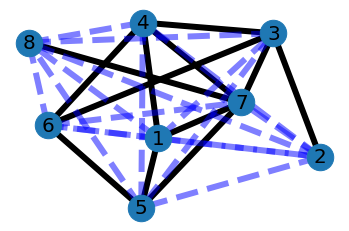

In [33]:
elarge = [(u, v) for (u, v, d) in graph.edges(data=True) if d['weight'] > 250]
esmall = [(u, v) for (u, v, d) in graph.edges(data=True) if d['weight'] <= 250]

pos = nx.spring_layout(graph)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(graph, pos, node_size=700)

# edges
nx.draw_networkx_edges(graph, pos, edgelist=elarge,
                       width=6)
nx.draw_networkx_edges(graph, pos, edgelist=esmall,
                       width=6, alpha=0.5, edge_color='b', style='dashed')

# labels
nx.draw_networkx_labels(graph, pos, font_size=20, font_family='sans-serif')

plt.axis('off')
plt.show()

As we can see, the above matches my own drawing of the possible links is the previous question.

In [34]:
graph = {
    '1': {'2':240, '3':210, '4':340, '5':280, '6':200, '7':345, '8':120},
    '2': {'3':265, '4':175, '5': 215, '6':180, '7':185, '8':155},
    '3': {'4':260, '5':115, '6':350, '7':435, '8':195},
    '4': {'5':160, '6':330, '7':295, '8':230},
    '5': {'6':360, '7':400, '8':170},
    '6': {'7':175, '8':205},
    '7': {'8':305},
    '8': {}
}

#### iv. compute the MST using Prim’s algorithm

In [35]:
# algorithm from https://bradfieldcs.com/algos/graphs/prims-spanning-tree-algorithm/
def create_spanning_tree(graph, starting_vertex):
    mst = defaultdict(set)
    visited = set([starting_vertex])
    edges = [
        (cost, starting_vertex, to)
        for to, cost in graph[starting_vertex].items()
    ]
    heapq.heapify(edges)

    while edges:
        cost, frm, to = heapq.heappop(edges)
        if to not in visited:
            visited.add(to)
            mst[frm].add(to)
            for to_next, cost in graph[to].items():
                if to_next not in visited:
                    heapq.heappush(edges, (cost, to, to_next))

    return mst

In [36]:
dict(create_spanning_tree(graph, '1'))

{'1': {'2', '3', '6', '8'}, '6': {'7'}, '3': {'5'}, '2': {'4'}}

The above output matches my outuput in the previous exercises and shown the 7 bridges matches the 7 bridges in the previous question.

#### v. draw the MST graph

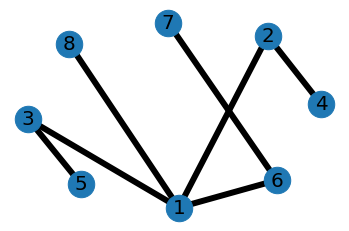

In [37]:
graph = nx.Graph()
graph.add_node('1')
graph.add_node('2')
graph.add_node('3')
graph.add_node('4')
graph.add_node('5')
graph.add_node('6')
graph.add_node('7')
graph.add_node('8')


graph.add_edge('1', '2', weight = 0)
graph.add_edge('1', '3', weight = 0)
graph.add_edge('1', '6', weight = 0)
graph.add_edge('1', '8', weight = 0)
graph.add_edge('6', '7', weight = 0)
graph.add_edge('3', '5', weight = 0)
graph.add_edge('2', '4', weight = 0)

esmall = [(u, v) for (u, v, d) in graph.edges(data=True) if d['weight'] > 1]
elarge = [(u, v) for (u, v, d) in graph.edges(data=True) if d['weight'] <= 1]

pos = nx.spring_layout(graph)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(graph, pos, node_size=700)

# edges
nx.draw_networkx_edges(graph, pos, edgelist=elarge,
                       width=6)
nx.draw_networkx_edges(graph, pos, edgelist=esmall,
                       width=6, alpha=0.5, edge_color='b', style='dashed')

# labels
nx.draw_networkx_labels(graph, pos, font_size=20, font_family='sans-serif')

plt.axis('off')
plt.show()

The graph above shows the connections of the MST, which matches the values achieved at question 1. The above shows all the 7 bridges and how the cities connect to each other. This is the solution to building the cheapest path over 7 bridges' connection.